In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("twitter.csv")

In [4]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [8]:
data["label"]=data["class"].map({
    0:"Hate Speech",
    1:"Offensive Language",
    2:"No Hate"
})

In [9]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [10]:
dataset=data[["tweet","label"]]
dataset

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No Hate
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [11]:
import re
import nltk
import string

In [7]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/mzah/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))

In [13]:
stemmer=nltk.SnowballStemmer("english")

In [14]:
def data_clean(text):
    text=str(text).lower()
    # Removal of all types of punctuations and irrelevant data
    text=re.sub('https?://\S+|www\.S+',"",text)
    text=re.sub('\[.*?\]',"",text)
    text=re.sub('<.*?>+',"",text)
    text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text=re.sub("\n",'',text)
    text=re.sub("\w*\d\w*",'',text)
    # Removal of Stopwords
    text=[word for word in text.split(" ") if word not in stopwords]
    text=" ".join(text)
    # Stemming the words
    text=[stemmer.stem(word) for word in text.split(" ")]
    text=" ".join(text)
    return text

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
/var/folders/jt/nmblf7nx32j8pbc32nr8ty3r0000gn/T/ipykernel_55592/3842830264.py:4: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.S+',"",text)
/var/folders/jt/nmblf7nx32j8pbc32nr8ty3r0000gn/T/ipykernel_55592/3842830264.py:5: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]',"",text)
/var/folders/jt/nmblf7nx32j8pbc32nr8ty3r0000gn/T/ipykernel_55592/3842830264.py:9: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub("\w*\d\w*",'',text)


In [15]:
dataset["tweet"]=dataset["tweet"].apply(data_clean)

/var/folders/jt/nmblf7nx32j8pbc32nr8ty3r0000gn/T/ipykernel_55592/652295289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tweet"]=dataset["tweet"].apply(data_clean)


In [16]:
dataset

,tweet,label
0,rt mayasolov woman shouldnt complain clean ho...,No Hate
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No Hate
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [17]:
X=np.array(data['tweet'])
y=np.array(data['label'])

In [18]:
X

array(["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
       '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
       '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit',
       ...,
       'young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again',
       'youu got wild bitches tellin you lies',
       '~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB'],
      shape=(24783,), dtype=object)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [20]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(X)

In [21]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 324058 stored elements and shape (24783, 35852)>

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [23]:
# Building an ML model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
# Predicitng the output
y_pred=model.predict(X_test)
y_pred

array(['Offensive Language', 'Offensive Language', 'Offensive Language',
       ..., 'No Hate', 'Offensive Language', 'Offensive Language'],
      shape=(8179,), dtype=object)

In [25]:
# Confusion Matrix and Accuracy of the model
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
cm

array([[ 117,   31,  195],
       [  49, 1198,  161],
       [ 299,  150, 5979]])

In [26]:
import seaborn as sns
%matplotlib inline

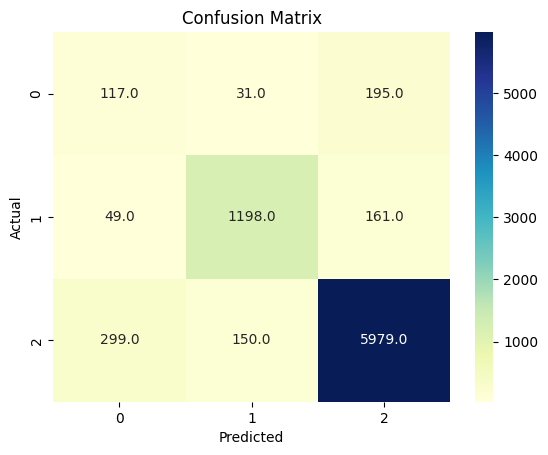

In [27]:
sns.heatmap(cm,annot=True,fmt=".1f",cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
accuracu=accuracy_score(y_test,y_pred)
accuracu

0.8917960630883971

In [29]:
sample="Let's Unite and Kill all the people who are protesting against the government."
sample=data_clean(sample)

In [31]:
sample

'let unit kill peopl protest govern'

In [32]:
data1=vectorizer.transform([sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 35852))

In [33]:
model.predict(data1)

array(['No Hate'], dtype=object)